# Actividad Evaluable: Patrones con K-means
Nombre: Angel Orlando Vázquez Morales
, Matrícula: A01659000

### 1. Carga de datos (covid19_tweets.csv)

In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/covid19_tweets.csv")
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


### 2. Relacion entre Amistades y Followers.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


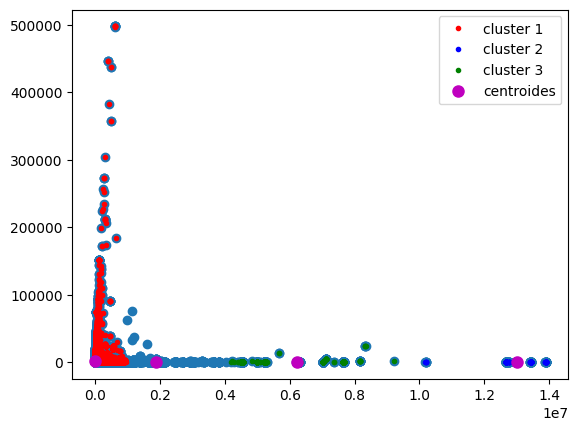

In [13]:
# Relacion entre Amistades y Followers.
points = []
for i in range(len(df['user_followers'])):
  points.append([df["user_followers"][i], df["user_friends"][i]])

pnp = np.array(points)
plt.scatter(pnp[:,0],pnp[:,1])

n = 4
k_means = KMeans(n_clusters=n, max_iter=300, tol=1e+1)
k_means.fit(pnp)

centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(pnp[etiquetas==0,0],pnp[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(pnp[etiquetas==1,0],pnp[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(pnp[etiquetas==2,0],pnp[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

**¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?**

Creo que con estos centros calculados, se pueden sacar conclusiones. La primera razón es que los centros se ajustan a los diferentes picos con numero de amistades que varían en el diagrama, en especial el primer pico donde existe una explosión de amistades para los usuarios o bots que tienen pocos followers.

**¿Cómo obtuviste el valor de k a usar?**

Primero probé graficando con un valor de k = 3, y meti otros valores como k = 4 y k = 5 y k = 6, y al final elegí el valor de 4, pues siento que se ajusta mejor este valor. Con k = 4 se dividen a los datos en 4 agrupaciones que se ajustan a picos de amigos, y separan concretamente los grupos entre los más famosos de la plataforma, aquellos que son medianamente reconocidos, los localmente reconocidos y la gran mayoría que son usuarios que revisan información o bots.

**¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?**

No creo que los centros se ajustarían más

**¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?**

ABC

**¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?**

ABC

**¿Qué puedes decir de los datos basándose en los centros?**

ABC